**Q1.** Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("D:\VIDEOS\PW Skills\Assignments\WEEK 16\diabetes.csv")

print(data.head())

print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

**Pregnancies:**

The range is from 0 to 17, with an average of around 3.85 pregnancies.

The majority of patients have fewer pregnancies, as indicated by the lower quartiles.

**Glucose:**

The average glucose level is approximately 120.9 mg/dL.

There are instances where the glucose level is 0, which might indicate missing or incorrect data.

**BloodPressure:**

The average diastolic blood pressure is around 69.1 mm Hg.

Similar to glucose, there are values of 0, which may suggest missing or inaccurate data.

**SkinThickness:**

The distribution of triceps skin fold thickness shows some values at 0, which might indicate missing data.

**Insulin:**

There are a significant number of entries with insulin levels at 0, which could represent missing data or actual zero values.

The distribution has a wide range, with a maximum of 846.

**BMI:**

The average BMI is approximately 31.99.

The distribution of BMI values seems reasonable.

**DiabetesPedigreeFunction:**

The average diabetes pedigree function score is around 0.47.

The distribution of scores varies, with some higher values indicating a potential genetic predisposition to diabetes.

**Age:**

The average age is around 33.24 years.

The dataset includes patients with ages ranging from 21 to 81 years.

**Outcome (Target Variable - Diabetes):**

The target variable is binary, with 0 indicating non-diabetic and 1 indicating diabetic.

The dataset appears to have a mix of diabetic and non-diabetic cases.

**Visualizations:**

The histograms provide a visual representation of the distribution of each variable.

The pairplot with color-coded outcomes helps visualize potential relationships between variables and their impact on diabetes.

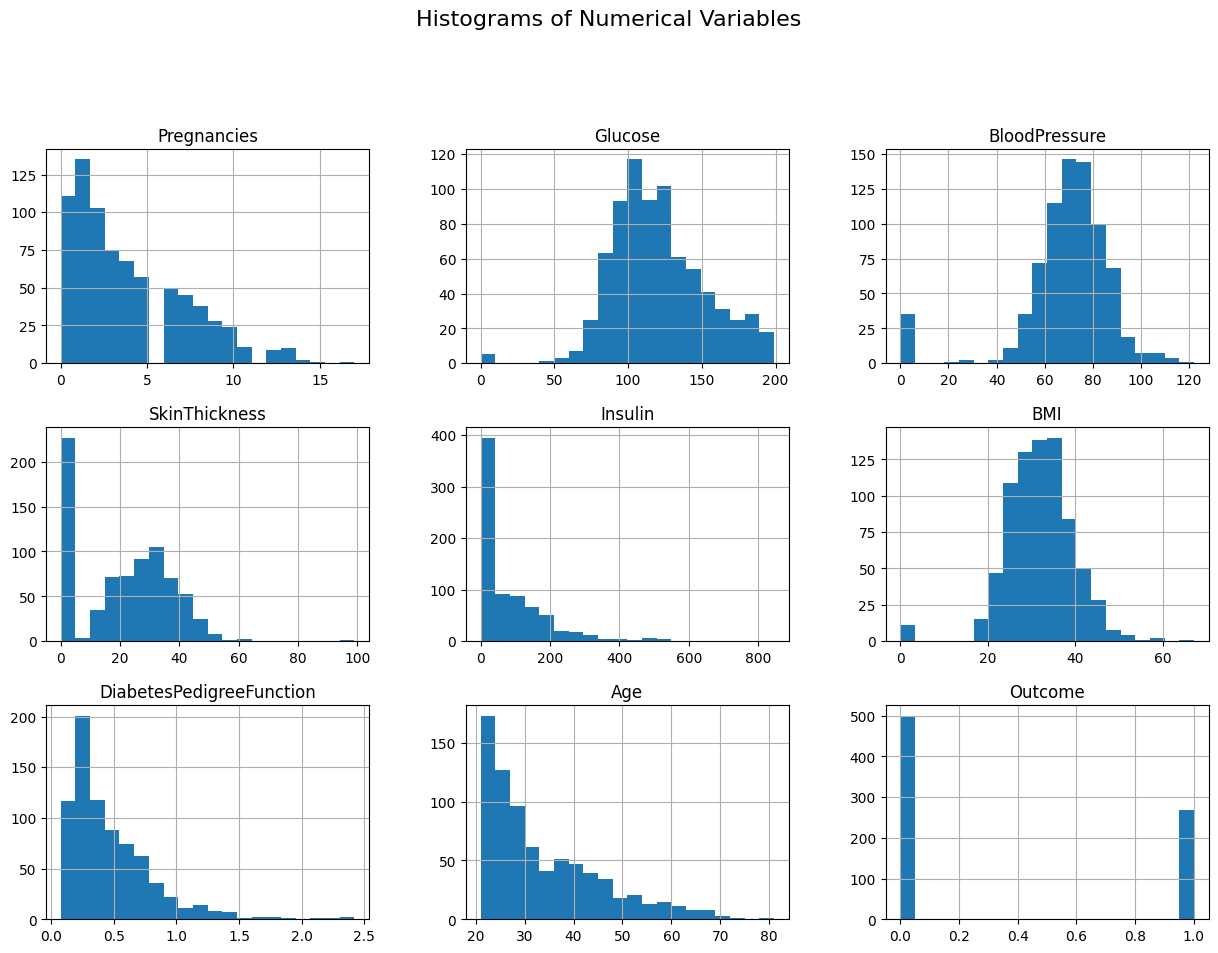

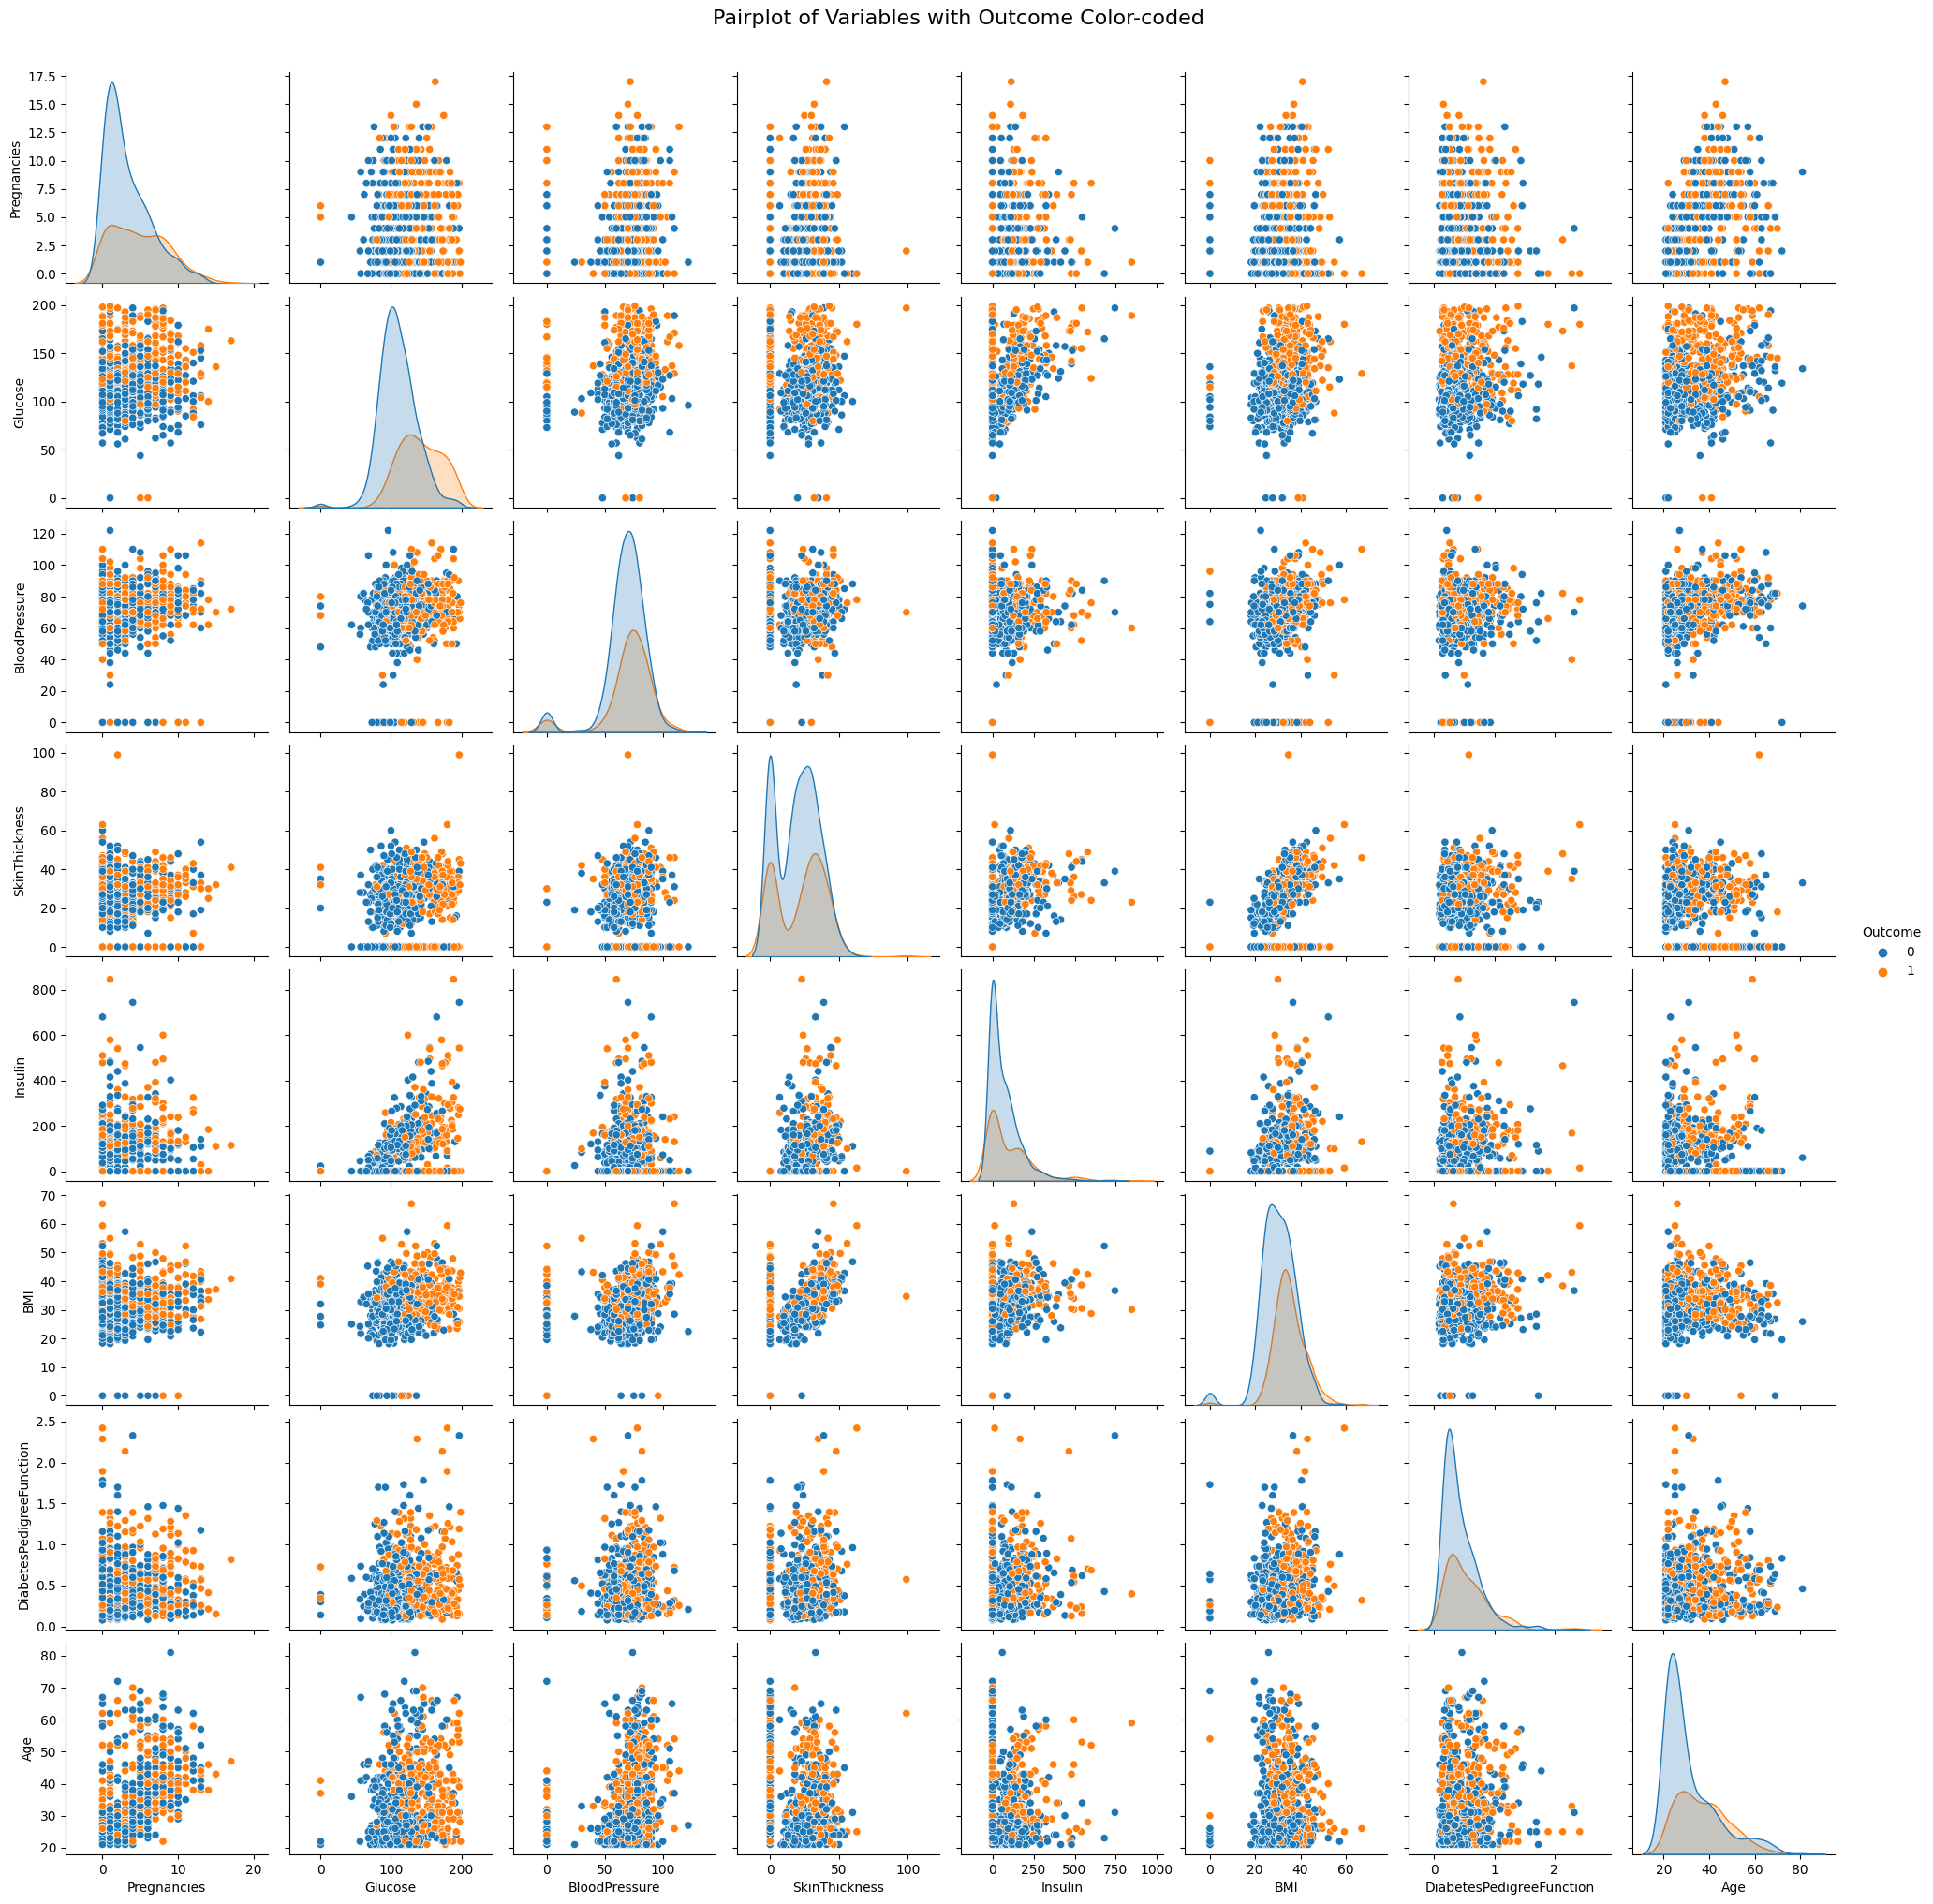

In [35]:
data.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Variables", y=1.02, fontsize=16)
plt.show()

sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of Variables with Outcome Color-coded", y=1.02, fontsize=16)
plt.show()

**Q2.** Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


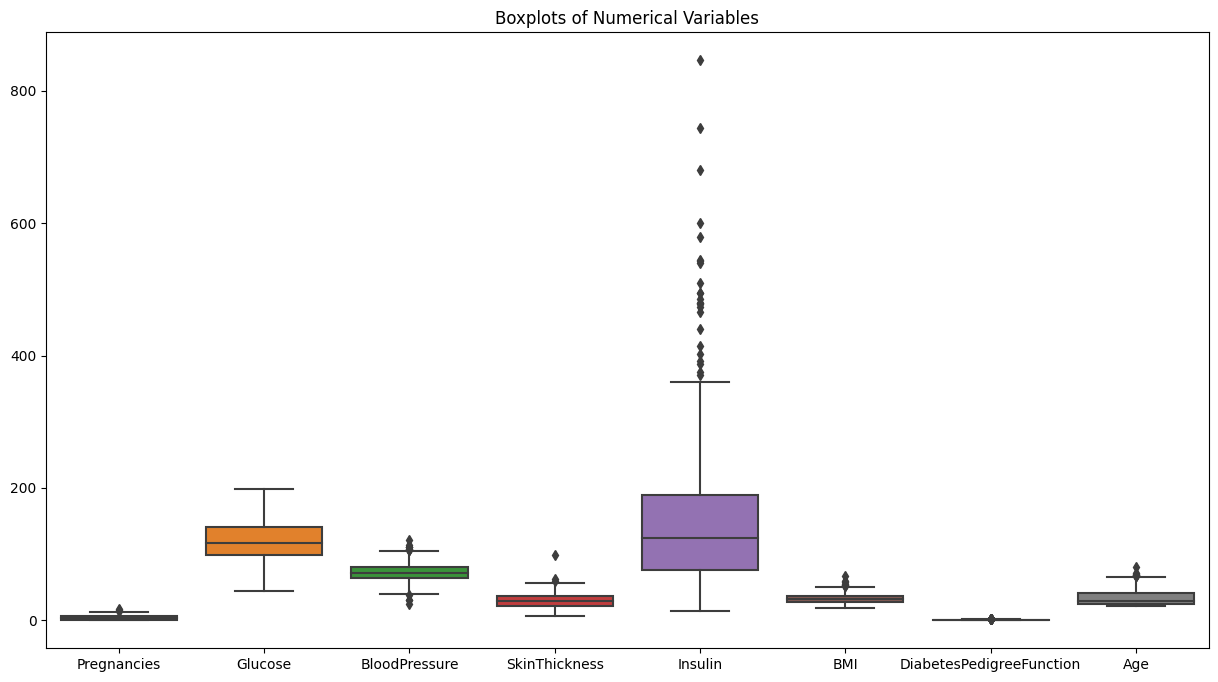

In [36]:
# Step 1: Handling Missing Values
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

print(data.isnull().sum())

# Step 2: Dealing with Outliers
# Visualize boxplots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title("Boxplots of Numerical Variables")
plt.show()
# In this dataset, there are no explicit categorical variables.

In [37]:
# Impute missing values with the median for numeric columns
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

**Q3.** Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [38]:
from sklearn.model_selection import train_test_split

random_seed = 42

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


**Q4.** Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

For decision tree classification, a commonly used algorithm is the C4.5 algorithm, which is an extension of ID3. In scikit-learn, the implementation of decision trees is available through the DecisionTreeClassifier. Cross-validation can be performed using tools like GridSearchCV to optimize hyperparameters and avoid overfitting.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=random_seed)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a decision tree model with the best hyperparameters on the full training set
best_dt_model = DecisionTreeClassifier(random_state=random_seed, **best_params)
best_dt_model.fit(X_train, y_train)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

**Q5.** Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.7143
Precision: 0.5714
Recall: 0.8000
F1 Score: 0.6667

Confusion Matrix:
[[66 33]
 [11 44]]


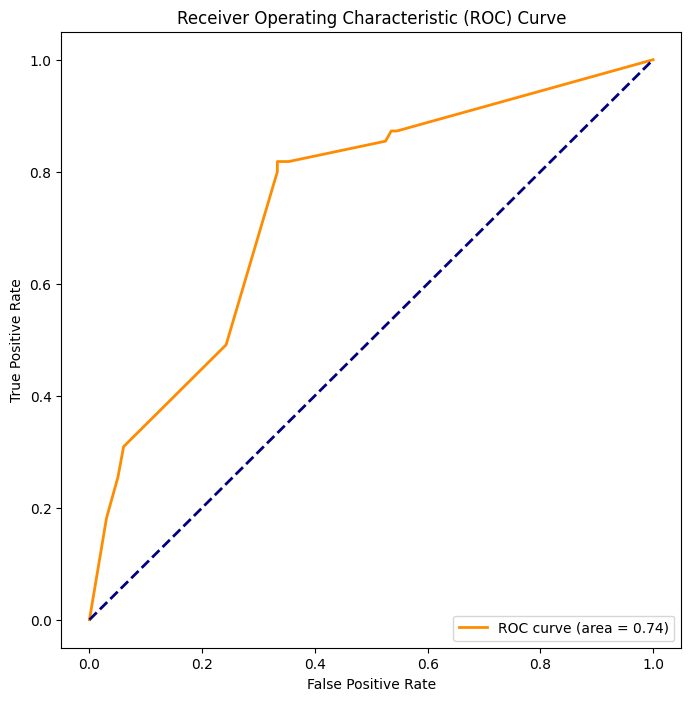

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display classification metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Q6.** Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Feature Importances:
                    Feature  Importance
1                   Glucose    0.483648
5                       BMI    0.210669
7                       Age    0.141377
4                   Insulin    0.077991
2             BloodPressure    0.042210
0               Pregnancies    0.029479
3             SkinThickness    0.014626
6  DiabetesPedigreeFunction    0.000000


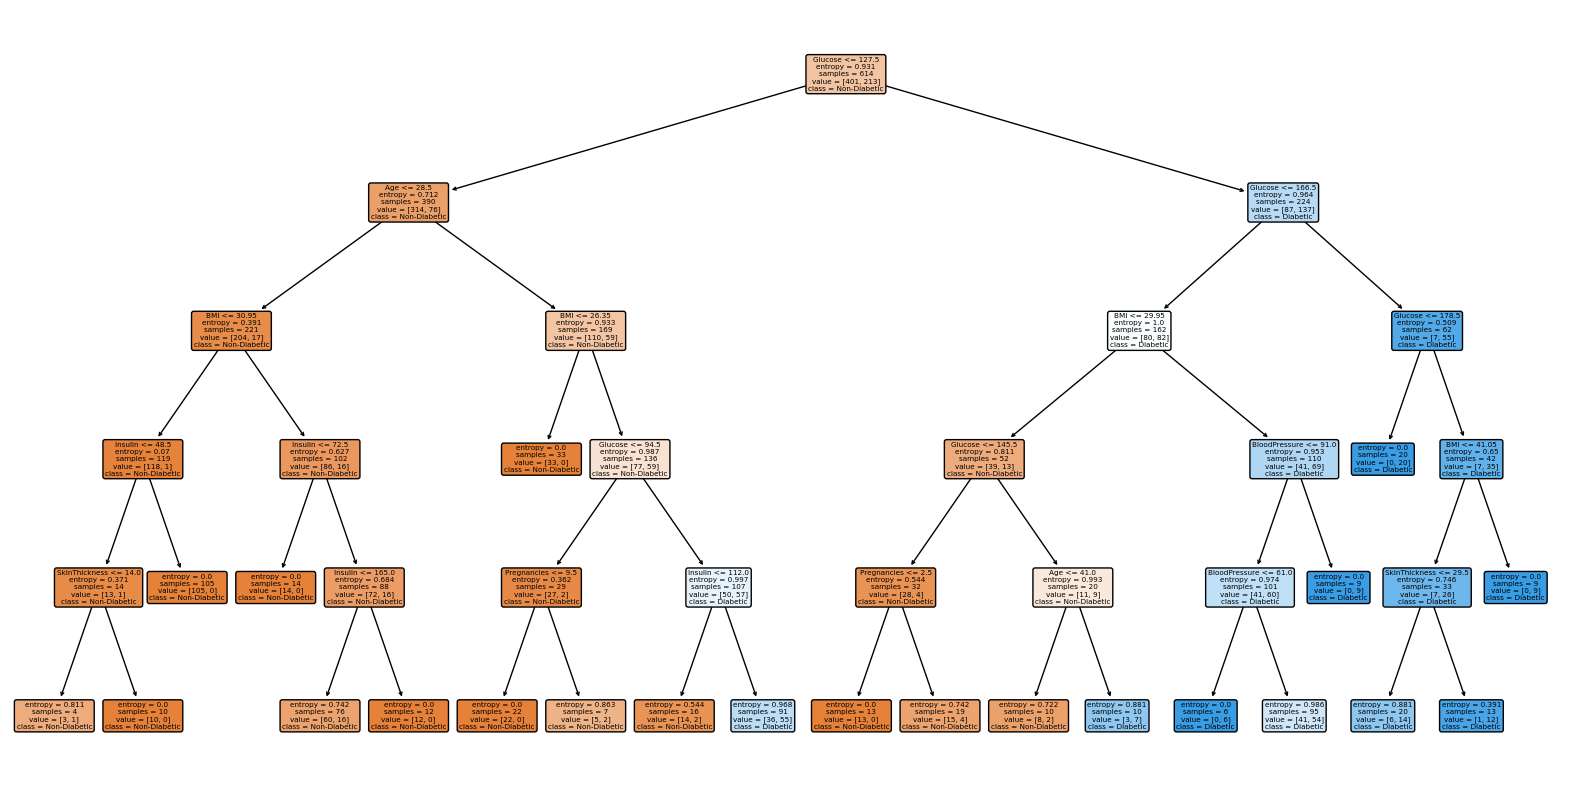

In [41]:
# Extract feature importances
feature_importances = best_dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()


**Q7.** Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [42]:
# Example of perturbing features
perturbed_data = X_test.copy()
perturbed_data['Glucose'] += 5  # Perturb Glucose values
perturbed_data['BMI'] -= 2      # Perturb BMI values

# Evaluate model on perturbed data
perturbed_predictions = best_dt_model.predict(perturbed_data)

# Compare perturbed predictions with original predictions
accuracy_perturbed = accuracy_score(y_test, perturbed_predictions)
print(f"Accuracy on Perturbed Data: {accuracy_perturbed:.4f}")


Accuracy on Perturbed Data: 0.6883


In [43]:
# Example of assessing feature importance stability
import numpy as np

# Function to calculate feature importance stability
def feature_importance_stability(model, X, y, num_iterations=100):
    importances = []
    for _ in range(num_iterations):
        # Randomly sample data
        indices = np.random.choice(range(len(X)), size=len(X), replace=True)
        X_subset, y_subset = X.iloc[indices], y.iloc[indices]

        # Train the model on the subset
        model.fit(X_subset, y_subset)
        importances.append(model.feature_importances_)

    return np.std(importances, axis=0)

# Calculate feature importance stability
importance_stability = feature_importance_stability(best_dt_model, X_train, y_train)
print("Feature Importance Stability:")
print(pd.DataFrame({'Feature': X_train.columns, 'Stability': importance_stability}).sort_values(by='Stability', ascending=False))


Feature Importance Stability:
                    Feature  Stability
1                   Glucose   0.071303
5                       BMI   0.054596
7                       Age   0.053138
6  DiabetesPedigreeFunction   0.045046
4                   Insulin   0.042648
3             SkinThickness   0.036847
0               Pregnancies   0.030314
2             BloodPressure   0.030129
